In [44]:
# Importing the necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# DATA PREPERATION

In [4]:
# Reading the CSV file
df = pd.read_csv("Warehouse_and_Retail_Sales.csv")

In [6]:
# Describing the CSV file
df.describe()

,YEAR,MONTH,RETAIL SALES,RETAIL TRANSFERS,WAREHOUSE SALES
count,307645.000000,307645.000000,307642.000000,307645.000000,307645.000000
mean,2018.438525,6.423862,7.024071,6.936465,25.294597
std,1.083061,3.461812,30.986238,30.237195,249.916798
min,2017.000000,1.000000,-6.490000,-38.490000,-7800.000000
25%,2017.000000,3.000000,0.000000,0.000000,0.000000
50%,2019.000000,7.000000,0.320000,0.000000,1.000000
75%,2019.000000,9.000000,3.267500,3.000000,5.000000
max,2020.000000,12.000000,2739.000000,1990.830000,18317.000000


In [168]:
# Visualising the top 10 data point
df.head(10)

,YEAR,MONTH,SUPPLIER,ITEM CODE,ITEM DESCRIPTION,ITEM TYPE,RETAIL SALES,RETAIL TRANSFERS,WAREHOUSE SALES,TOTAL SALES
0,2020,1,REPUBLIC NATIONAL DISTRIBUTING CO,100009,BOOTLEG RED - 750ML,WINE,0.00,0.0,2.0,2.00
1,2020,1,PWSWN INC,100024,MOMENT DE PLAISIR - 750ML,WINE,0.00,1.0,4.0,4.00
2,2020,1,RELIABLE CHURCHILL LLLP,1001,S SMITH ORGANIC PEAR CIDER - 18.7OZ,BEER,0.00,0.0,1.0,1.00
3,2020,1,LANTERNA DISTRIBUTORS INC,100145,SCHLINK HAUS KABINETT - 750ML,WINE,0.00,0.0,1.0,1.00
4,2020,1,DIONYSOS IMPORTS INC,100293,SANTORINI GAVALA WHITE - 750ML,WINE,0.82,0.0,0.0,0.82
5,2020,1,KYSELA PERE ET FILS LTD,100641,CORTENOVA VENETO P/GRIG - 750ML,WINE,2.76,0.0,6.0,8.76
6,2020,1,SANTA MARGHERITA USA INC,100749,SANTA MARGHERITA P/GRIG ALTO - 375ML,WINE,0.08,1.0,1.0,1.08
7,2020,1,BROWN-FORMAN BEVERAGES WORLDWIDE,1008,JACK DANIELS COUNTRY COCKTAIL SOUTHERN PEACH -...,BEER,0.00,0.0,2.0,2.00
8,2020,1,JIM BEAM BRANDS CO,10103,KNOB CREEK BOURBON 9YR - 100P - 375ML,LIQUOR,6.41,4.0,0.0,6.41
9,2020,1,INTERNATIONAL CELLARS LLC,101117,KSARA CAB - 750ML,WINE,0.33,1.0,2.0,2.33


In [10]:
# Checking for the null value
df.isnull().sum()
# Null Value is in SUPPLIER column

YEAR                  0
MONTH                 0
SUPPLIER            167
ITEM CODE             0
ITEM DESCRIPTION      0
ITEM TYPE             1
RETAIL SALES          3
RETAIL TRANSFERS      0
WAREHOUSE SALES       0
dtype: int64

In [12]:
# Dropping the NULL Value
df.dropna(inplace = True)

In [14]:
# Checking for the null values again
df.isnull().sum()

YEAR                0
MONTH               0
SUPPLIER            0
ITEM CODE           0
ITEM DESCRIPTION    0
ITEM TYPE           0
RETAIL SALES        0
RETAIL TRANSFERS    0
WAREHOUSE SALES     0
dtype: int64

In [169]:
# Checking for the duplicates
df.duplicated().sum()

0

In [24]:
# Printing the shape of the dataframe
df.shape

(307477, 9)

In [29]:
# Printing the unique entry in supplier column
df['SUPPLIER'].unique().shape

(396,)

In [31]:
# Value counting the item type
df['ITEM TYPE'].value_counts()

ITEM TYPE
WINE            187640
LIQUOR           64910
BEER             42413
KEGS             10146
NON-ALCOHOL       1899
STR_SUPPLIES       318
REF                 79
DUNNAGE             72
Name: count, dtype: int64

In [33]:
# Value Counting the Retail sales
df['RETAIL SALES'].value_counts()

RETAIL SALES
0.00      121630
0.08       10660
0.17        6819
0.16        6089
0.24        3921
           ...  
163.73         1
441.55         1
130.50         1
69.60          1
179.16         1
Name: count, Length: 10670, dtype: int64

In [36]:
# Checking the datatype of each column
df.dtypes

YEAR                  int64
MONTH                 int64
SUPPLIER             object
ITEM CODE            object
ITEM DESCRIPTION     object
ITEM TYPE            object
RETAIL SALES        float64
RETAIL TRANSFERS    float64
WAREHOUSE SALES     float64
dtype: object

# EXPLORATORY DATA ANALYSIS

In [172]:
# Calculating retail sales by year by grouping by on year
df_total_retail_sales_by_year = df.groupby('YEAR')['RETAIL SALES'].sum().reset_index()
df_total_retail_sales_by_year


,YEAR,RETAIL SALES
0,2017,686734.57
1,2018,153595.90
2,2019,958179.83
3,2020,354949.09


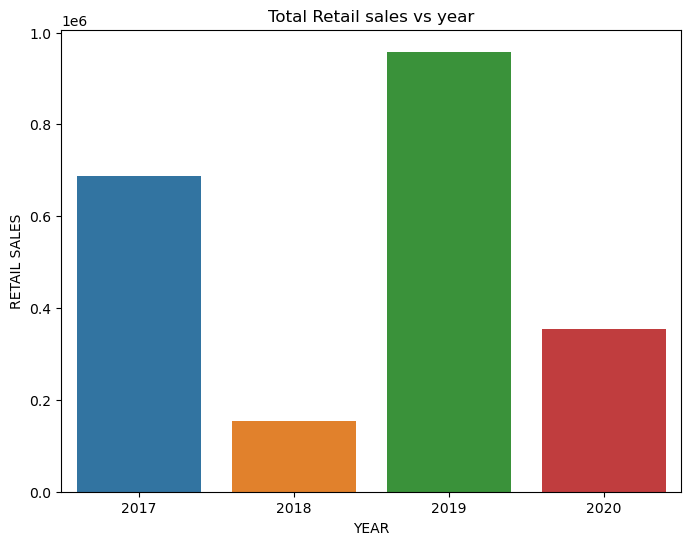

In [175]:
# Plotting the total retail sales by year
plt.figure(figsize = (8,6))
sns.barplot(data = df_total_retail_sales_by_year, x = df_total_retail_sales_by_year['YEAR'], y = df_total_retail_sales_by_year['RETAIL SALES'])
plt.title("Total Retail sales vs year")
plt.show()

In [85]:
# Finding the top supplier
df_top5_supplier = df.groupby('SUPPLIER')['RETAIL SALES'].sum().reset_index().sort_values('RETAIL SALES' ,ascending = False)
df_top5_supplier

,SUPPLIER,RETAIL SALES
108,E & J GALLO WINERY,166170.53
90,DIAGEO NORTH AMERICA INC,145343.20
76,CONSTELLATION BRANDS,131664.79
15,ANHEUSER BUSCH INC,109960.82
173,JIM BEAM BRANDS CO,96164.04
...,...,...
282,RSL HOLDINGS INC,0.00
53,CALVERT BREWING COMPANY,0.00
45,BREWDOG BREWING COMPANY LLC,0.00
204,MARQUEE SELECTIONS LLC,0.00


In [88]:
# Finding the top 5 supplier
df_top5_supplier = df_top5_supplier.head(5)
df_top5_supplier

,SUPPLIER,RETAIL SALES
108,E & J GALLO WINERY,166170.53
90,DIAGEO NORTH AMERICA INC,145343.20
76,CONSTELLATION BRANDS,131664.79
15,ANHEUSER BUSCH INC,109960.82
173,JIM BEAM BRANDS CO,96164.04


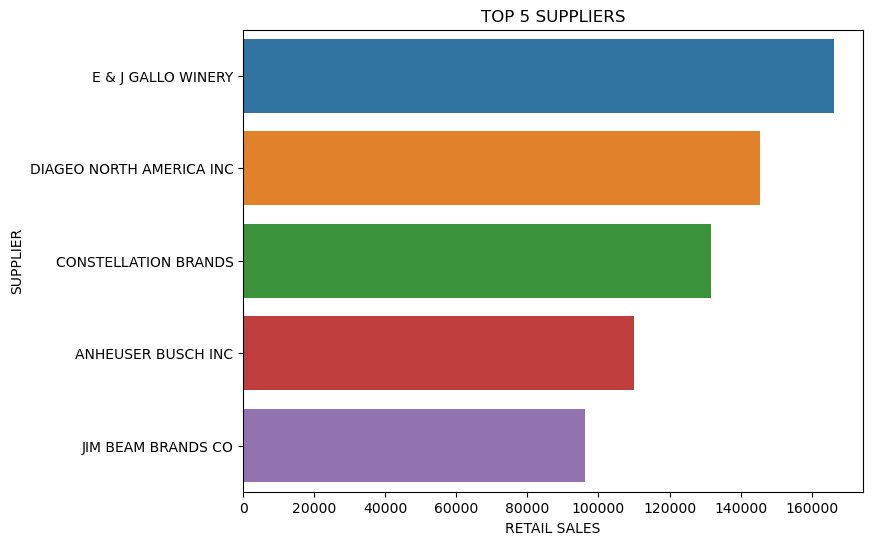

In [95]:
# Plotting the top 5 supplier against reatail sales
plt.figure(figsize = (8,6))
sns.barplot(data = df_top5_supplier , y = df_top5_supplier['SUPPLIER'] , x = df_top5_supplier['RETAIL SALES'])
plt.title("TOP 5 SUPPLIERS")
plt.show()

In [100]:
# Finding the top 10 item types on basis of retail sales
df_top10_ITEM_TYPE = df.groupby('ITEM TYPE')['RETAIL SALES'].sum().reset_index().sort_values('RETAIL SALES' ,ascending = False)
df_top10_ITEM_TYPE = df_top10_ITEM_TYPE.head(10)
df_top10_ITEM_TYPE

,ITEM TYPE,RETAIL SALES
3,LIQUOR,802691.43
7,WINE,746498.59
0,BEER,574220.53
4,NON-ALCOHOL,27150.31
6,STR_SUPPLIES,2234.90
5,REF,663.63
1,DUNNAGE,0.00
2,KEGS,0.00


In [185]:
# Finding the top 10 item types on basis of warehouse sales
df_top10_ITEM_TYPE_warehouse = df.groupby('ITEM TYPE')['WAREHOUSE SALES'].sum().reset_index().sort_values('WAREHOUSE SALES' ,ascending = False)
df_top10_ITEM_TYPE_warehouse = df_top10_ITEM_TYPE_warehouse.head(10)
df_top10_ITEM_TYPE_warehouse

,ITEM TYPE,WAREHOUSE SALES
0,BEER,6527236.51
7,WINE,1156984.91
2,KEGS,118431.00
3,LIQUOR,94906.27
4,NON-ALCOHOL,26149.59
5,REF,0.00
6,STR_SUPPLIES,0.00
1,DUNNAGE,-121307.00


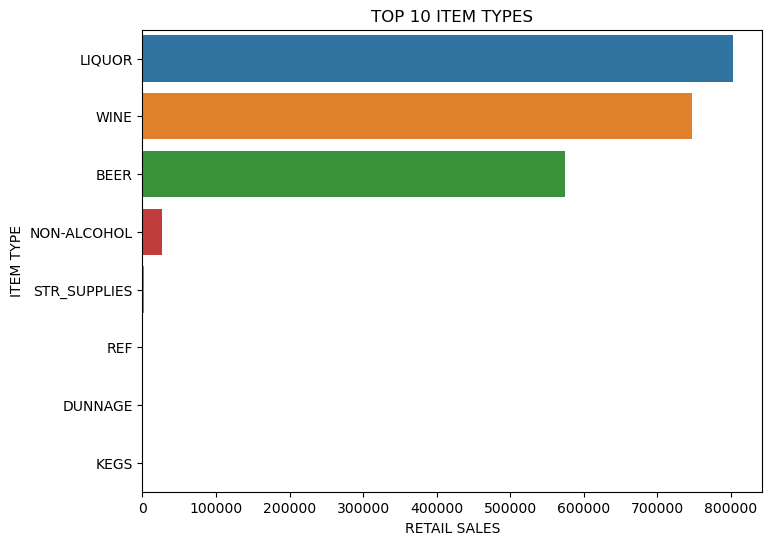

In [174]:
# Visualisation of top 10 item types on basis of retail sales
plt.figure(figsize = (8,6))
sns.barplot(data = df_top10_ITEM_TYPE , y = df_top10_ITEM_TYPE['ITEM TYPE'] , x = df_top10_ITEM_TYPE['RETAIL SALES'])
plt.title("TOP 10 ITEM TYPES")
plt.show()

# BUSINESS ANALYSIS

In [114]:
# Calculating the monthly average retail sales for each year
df_monthly_average_RETAIL = df.groupby(['MONTH','YEAR'])['RETAIL SALES'].mean().reset_index().sort_values(['YEAR','MONTH'] ,ascending = True)
df_monthly_average_RETAIL

,MONTH,YEAR,RETAIL SALES
9,6,2017,7.145487
11,7,2017,7.114624
14,8,2017,6.411406
16,9,2017,6.758769
19,10,2017,6.550944
21,11,2017,6.766893
23,12,2017,9.080119
0,1,2018,5.680690
3,2,2018,5.940607
1,1,2019,6.143881


In [116]:
# Calculating the monthly average warehouse sales for each year
df_monthly_average_WAREHOUSE = df.groupby(['MONTH','YEAR'])['WAREHOUSE SALES'].mean().reset_index().sort_values(['YEAR','MONTH'] ,ascending = True)
df_monthly_average_WAREHOUSE

,MONTH,YEAR,WAREHOUSE SALES
9,6,2017,27.850703
11,7,2017,24.342291
14,8,2017,28.181033
16,9,2017,22.862328
19,10,2017,22.393842
21,11,2017,23.500630
23,12,2017,21.298560
0,1,2018,19.084146
3,2,2018,20.243378
1,1,2019,22.750888


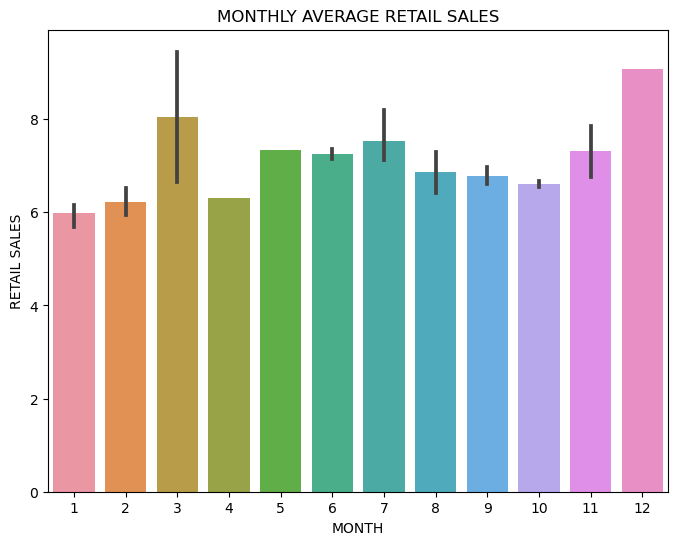

In [130]:
# Plotting the monthly average retail sales
plt.figure(figsize = (8,6))
sns.barplot(data = df_monthly_average_RETAIL , x= df_monthly_average_RETAIL['MONTH'] , y = df_monthly_average_RETAIL['RETAIL SALES'])
plt.title("MONTHLY AVERAGE RETAIL SALES")
plt.show()

In [142]:
# Calculating the yearly average retail sales
df_yearly_average_RETAIL = df.groupby('YEAR')['RETAIL SALES'].mean().reset_index().sort_values('YEAR' ,ascending = True)
df_yearly_average_RETAIL

,YEAR,RETAIL SALES
0,2017,7.134015
1,2018,5.809444
2,2019,6.916169
3,2020,7.677231


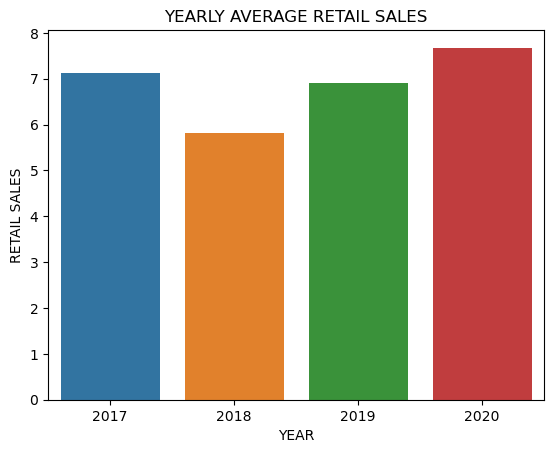

In [145]:
# Plotting the yearly average retail sales
sns.barplot(data = df_yearly_average_RETAIL , x = df_yearly_average_RETAIL['YEAR'] , y = df_yearly_average_RETAIL['RETAIL SALES'])
plt.title("YEARLY AVERAGE RETAIL SALES")
plt.show()

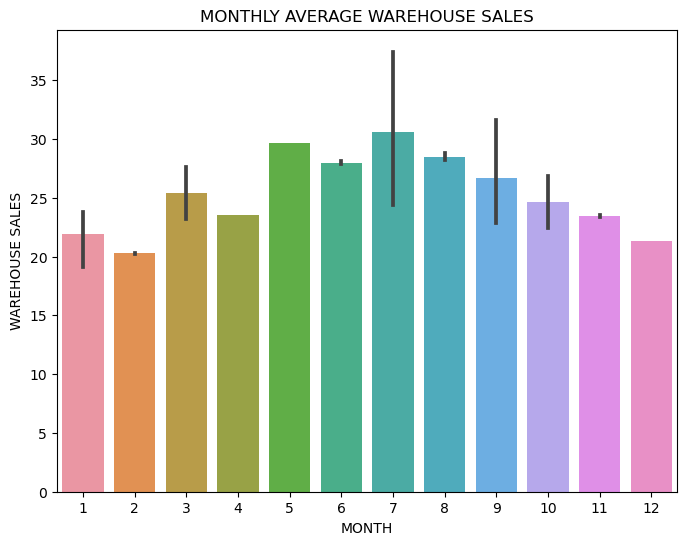

In [148]:
# Plotting the monthly average warehoue sales
plt.figure(figsize = (8,6))
sns.barplot(data = df_monthly_average_WAREHOUSE , x= df_monthly_average_WAREHOUSE['MONTH'] , y = df_monthly_average_WAREHOUSE['WAREHOUSE SALES'])
plt.title("MONTHLY AVERAGE WAREHOUSE SALES")
plt.show()

In [150]:
# Finding the yearly average warehouse sales
df_yearly_average_WAREHOUSE = df.groupby('YEAR')['WAREHOUSE SALES'].mean().reset_index().sort_values('YEAR' ,ascending = True)
df_yearly_average_WAREHOUSE

,YEAR,WAREHOUSE SALES
0,2017,24.313801
1,2018,19.658391
2,2019,25.665150
3,2020,29.987817


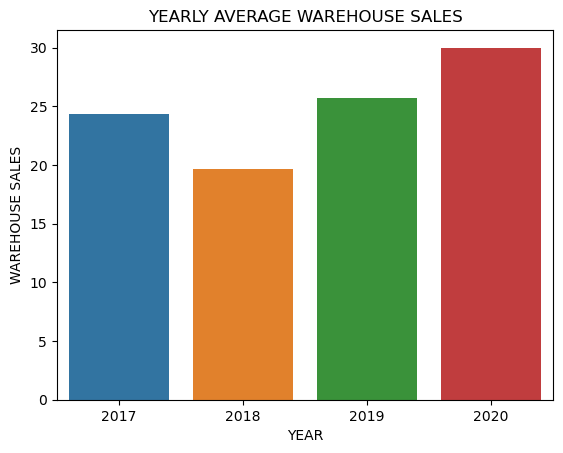

In [152]:
# Plotting the yearly average warehouse sales
sns.barplot(data = df_yearly_average_WAREHOUSE , x = df_yearly_average_WAREHOUSE['YEAR'] , y = df_yearly_average_WAREHOUSE['WAREHOUSE SALES'])
plt.title("YEARLY AVERAGE WAREHOUSE SALES")
plt.show()

In [155]:
# Calculating the total sales by adding teh retail sales and warehouse sales
# Total Sales = Retail Sales + Warehouse Sales
df['TOTAL SALES'] = df['RETAIL SALES'] + df['WAREHOUSE SALES']
df['TOTAL SALES']

0            2.00
1            4.00
2            1.00
3            1.00
4            0.82
           ...   
307639    6380.96
307640     604.00
307641      41.50
307642      65.00
307643       1.17
Name: TOTAL SALES, Length: 307477, dtype: float64

In [178]:
# Calculating the Total Sales per Item Type
df_ITEM_TYPE_TOTAL_SALES = df.groupby('ITEM TYPE')['TOTAL SALES'].sum().reset_index().sort_values('TOTAL SALES' ,ascending = False)
# df_ITEM_TYPE_TOTAL_SALES = df_top10_ITEM_TYPE.head(10)
df_ITEM_TYPE_TOTAL_SALES_NEW = df_ITEM_TYPE_TOTAL_SALES.head(7)
df_ITEM_TYPE_TOTAL_SALES_NEW

,ITEM TYPE,TOTAL SALES
0,BEER,7101457.04
7,WINE,1903483.50
3,LIQUOR,897597.70
2,KEGS,118431.00
4,NON-ALCOHOL,53299.90
6,STR_SUPPLIES,2234.90
5,REF,663.63


In [181]:
df_ITEM_TYPE_TOTAL_SALES

,ITEM TYPE,TOTAL SALES
0,BEER,7101457.04
7,WINE,1903483.50
3,LIQUOR,897597.70
2,KEGS,118431.00
4,NON-ALCOHOL,53299.90
6,STR_SUPPLIES,2234.90
5,REF,663.63
1,DUNNAGE,-121307.00


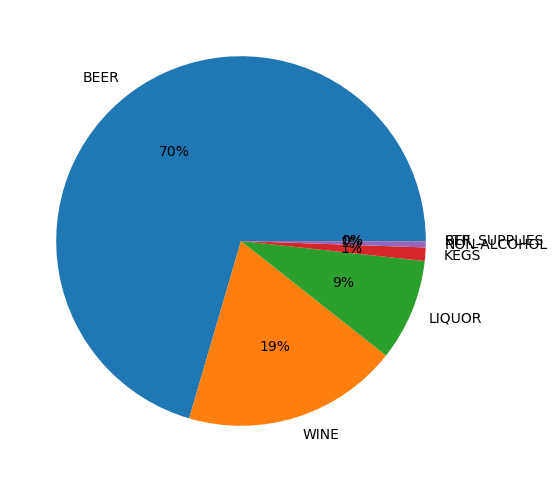

In [183]:
# Plotting a Pie Chart to showcase the contribution of each item type to total sales
plt.figure(figsize = (10,6))
plt.pie(df_ITEM_TYPE_TOTAL_SALES_NEW['TOTAL SALES'] , labels = df_ITEM_TYPE_TOTAL_SALES_NEW['ITEM TYPE'] , autopct = "%1.0f%%")
plt.show()

# RECOMMENDATION AND INSIGHTS